### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [9]:
df.drop(["urlDrugName", "condition", "benefitsReview", "sideEffectsReview", "commentsReview"], inplace=True, axis=1)

In [10]:
df

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects
...,...,...,...
1039,10,Highly Effective,Mild Side Effects
3281,1,Ineffective,Extremely Severe Side Effects
1664,2,Marginally Effective,Moderate Side Effects
2621,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [12]:
from sklearn.preprocessing import LabelEncoder

# Creamos codificadores
le_effectiveness = LabelEncoder()
le_sideEffects = LabelEncoder()

# Codificamos
df['effectiveness_encoded'] = le_effectiveness.fit_transform(df['effectiveness'])
df['sideEffects_encoded'] = le_sideEffects.fit_transform(df['sideEffects'])

# Revisamos
df[['effectiveness', 'effectiveness_encoded', 'sideEffects', 'sideEffects_encoded']]


,effectiveness,effectiveness_encoded,sideEffects,sideEffects_encoded
2202,Highly Effective,1,Mild Side Effects,1
3117,Highly Effective,1,Severe Side Effects,4
1146,Highly Effective,1,No Side Effects,3
3947,Marginally Effective,3,Mild Side Effects,1
1951,Marginally Effective,3,Severe Side Effects,4
...,...,...,...,...
1039,Highly Effective,1,Mild Side Effects,1
3281,Ineffective,2,Extremely Severe Side Effects,0
1664,Marginally Effective,3,Moderate Side Effects,2
2621,Considerably Effective,0,Mild Side Effects,1


In [ ]:
# Vemos los valores unicos

print("Effectiveness values:", df['effectiveness'].unique())
print()
print("SideEffects values:", df['sideEffects'].unique())


Effectiveness values: ['Highly Effective' 'Marginally Effective' 'Ineffective'
 'Considerably Effective' 'Moderately Effective']

SideEffects values: ['Mild Side Effects' 'Severe Side Effects' 'No Side Effects'
 'Extremely Severe Side Effects' 'Moderate Side Effects']


In [16]:
# Mapeo manual de effectiveness
effectiveness_map = {
    'Ineffective': 0,
    'Marginally Effective': 1,
    'Moderately Effective': 2,
    'Considerably Effective': 3,
    'Highly Effective': 4
}

# Mapeo manual de sideEffects
sideEffects_map = {
    'No Side Effects': 0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,
    'Severe Side Effects': 3,
    'Extremely Severe Side Effects': 4
}

# Aplicamos el mapeo
df['effectiveness_encoded'] = df['effectiveness'].map(effectiveness_map)
df['sideEffects_encoded'] = df['sideEffects'].map(sideEffects_map)

# Revisamos
df[['effectiveness', 'effectiveness_encoded', 'sideEffects', 'sideEffects_encoded']].head()


,effectiveness,effectiveness_encoded,sideEffects,sideEffects_encoded
2202,Highly Effective,4,Mild Side Effects,1
3117,Highly Effective,4,Severe Side Effects,3
1146,Highly Effective,4,No Side Effects,0
3947,Marginally Effective,1,Mild Side Effects,1
1951,Marginally Effective,1,Severe Side Effects,3


In [17]:
df_clustering = df[['rating', 'effectiveness_encoded', 'sideEffects_encoded']]


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [18]:
from sklearn.preprocessing import StandardScaler

# Creamos el scaler
scaler = StandardScaler()

# Ajustamos y transformamos
X_scaled = scaler.fit_transform(df_clustering)

# Revisamos
print(X_scaled[:5])


[[-1.02349444  0.86510788 -0.25889536]
 [-2.04490682  0.86510788  1.43991746]
 [ 1.01933033  0.86510788 -1.10830176]
 [-1.36396523 -1.57325636 -0.25889536]
 [-1.70443603 -1.57325636  1.43991746]]


#### Genera el K Means 

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_per_k = {}
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score para n_clusters={k}: {score}")
    kmeans_per_k[k]=score


Silhouette Score para n_clusters=2: 0.5239895385002081
Silhouette Score para n_clusters=3: 0.4054898470714643
Silhouette Score para n_clusters=4: 0.37275044705746624
Silhouette Score para n_clusters=5: 0.4021226450674886
Silhouette Score para n_clusters=6: 0.39664310228465116
Silhouette Score para n_clusters=7: 0.4175644874930821
Silhouette Score para n_clusters=8: 0.433644999051634
Silhouette Score para n_clusters=9: 0.4871878589147554
Silhouette Score para n_clusters=10: 0.515589572746421
Silhouette Score para n_clusters=11: 0.5277979042248157
Silhouette Score para n_clusters=12: 0.5338880245286387
Silhouette Score para n_clusters=13: 0.5302678332611578
Silhouette Score para n_clusters=14: 0.5399997505424641
Silhouette Score para n_clusters=15: 0.5428676263488224
Silhouette Score para n_clusters=16: 0.5469381578740338
Silhouette Score para n_clusters=17: 0.5554144179330832
Silhouette Score para n_clusters=18: 0.5499201262325591
Silhouette Score para n_clusters=19: 0.5559956325691472


In [42]:
kmeans_per_k

{2: np.float64(0.5239895385002081),
 3: np.float64(0.4054898470714643),
 4: np.float64(0.37275044705746624),
 5: np.float64(0.4021226450674886),
 6: np.float64(0.39664310228465116),
 7: np.float64(0.4175644874930821),
 8: np.float64(0.433644999051634),
 9: np.float64(0.4871878589147554),
 10: np.float64(0.515589572746421),
 11: np.float64(0.5277979042248157),
 12: np.float64(0.5338880245286387),
 13: np.float64(0.5302678332611578),
 14: np.float64(0.5399997505424641),
 15: np.float64(0.5428676263488224),
 16: np.float64(0.5469381578740338),
 17: np.float64(0.5554144179330832),
 18: np.float64(0.5499201262325591),
 19: np.float64(0.5559956325691472),
 20: np.float64(0.568595074864595),
 21: np.float64(0.5747358342326205),
 22: np.float64(0.5845535496328329),
 23: np.float64(0.5871642620724603),
 24: np.float64(0.5895185514834433)}

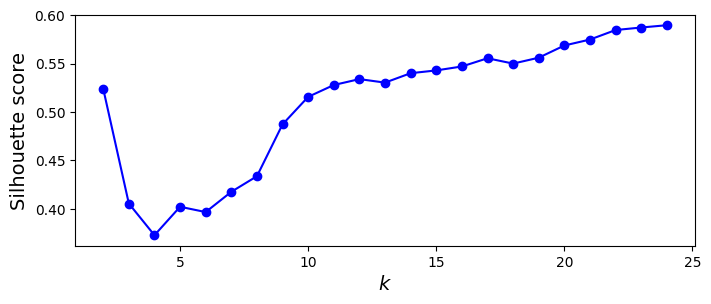

In [54]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 25), kmeans_per_k.values(), "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()


In [57]:
# Lista de Ks elegidas
ks = [2, 10, 12]

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Añadimos columna temporal de clusters
    df[f'cluster_{k}'] = labels
    
    # Calculamos silhouette
    score = silhouette_score(X_scaled, labels)
    print(f"\nResultados para n_clusters={k}:")
    print(f"Silhouette Score: {score}")
    
    # Conteo de elementos por cluster
    print("Tamaño de cada cluster:")
    print(df[f'cluster_{k}'].value_counts())

    # Medias de las variables por cluster
    print("Medias por cluster:")
    print(df.groupby(f'cluster_{k}')[['rating', 'effectiveness_encoded', 'sideEffects_encoded']].mean())


Resultados para n_clusters=2:
Silhouette Score: 0.5239895385002081
Tamaño de cada cluster:
cluster_2
0    2224
1     883
Name: count, dtype: int64
Medias por cluster:
             rating  effectiveness_encoded  sideEffects_encoded
cluster_2                                                      
0          8.586331               3.475270             0.820594
1          3.026048               1.576444             2.524349

Resultados para n_clusters=10:
Silhouette Score: 0.515589572746421
Tamaño de cada cluster:
cluster_10
5    527
8    471
4    374
0    337
7    312
2    257
9    230
6    220
3    204
1    175
Name: count, dtype: int64
Medias por cluster:
              rating  effectiveness_encoded  sideEffects_encoded
cluster_10                                                      
0           7.952522               3.753709             2.201780
1           2.514286               0.474286             1.251429
2           8.525292               2.988327             0.000000
3           

In [58]:
from sklearn.decomposition import PCA

# Reducimos a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape reducido:", X_pca.shape)


Shape reducido: (3107, 2)


In [59]:
def plot_clusters(X_pca, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    
    # Predicciones
    y_kmeans = kmeans.predict(X_pca)
    
    # Grid para fronteras
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot de fronteras
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Puntos
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=20, cmap='tab10')
    
    # Centroides
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=300, c='black', marker='x')
    
    plt.title(f"K-Means con n_clusters={n_clusters}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()


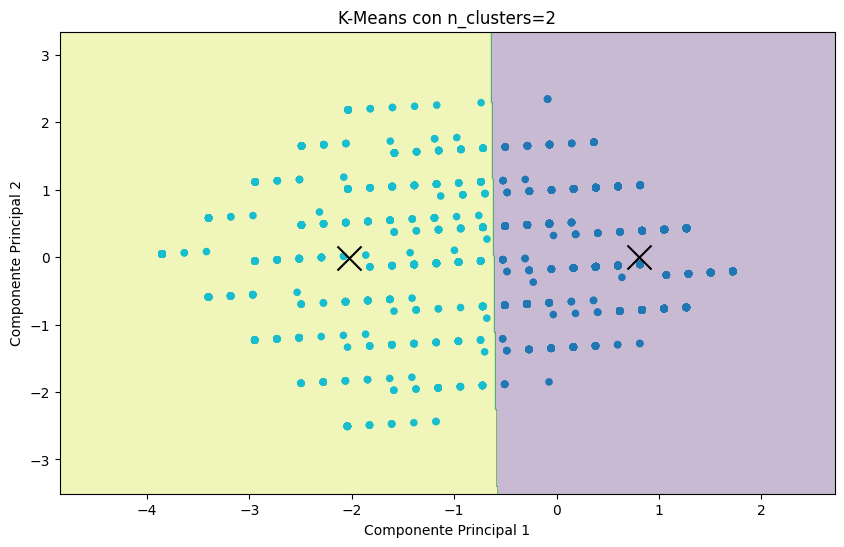

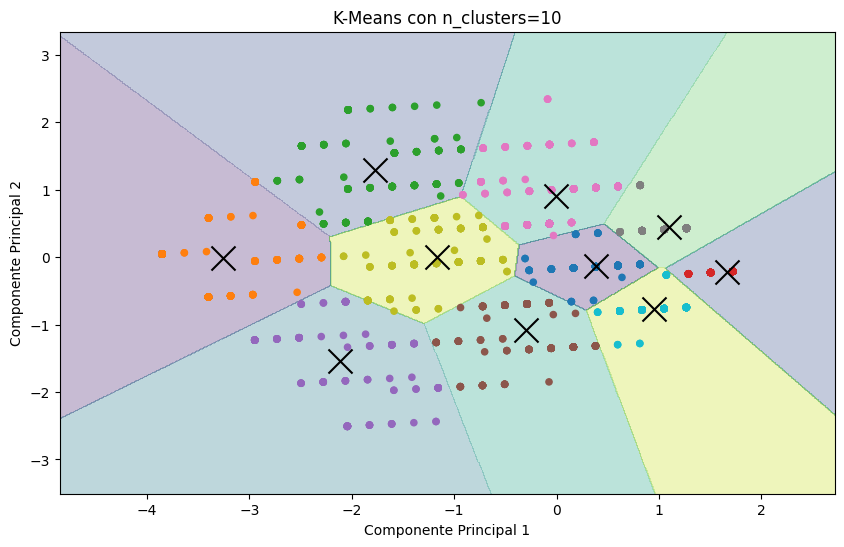

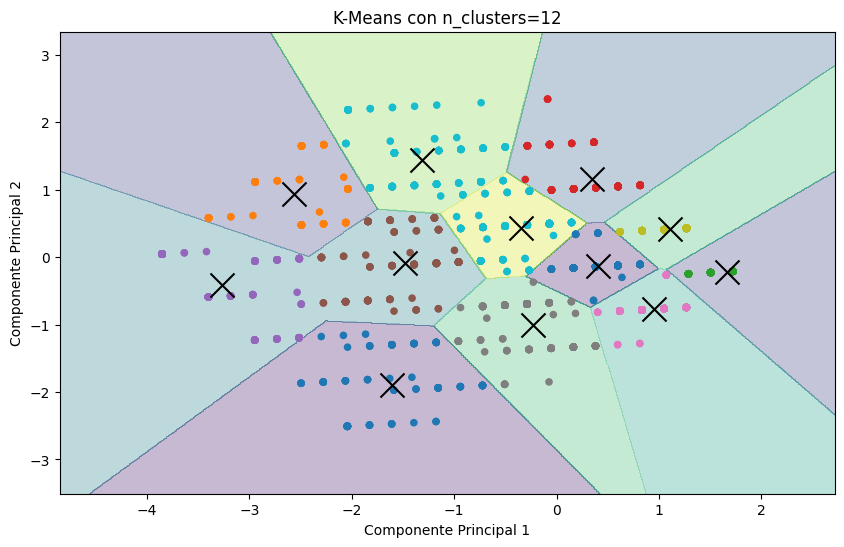

In [60]:
for k in [2, 10, 12]:
    plot_clusters(X_pca, k)


## Conclusiones:

Si solo queremos diferenciar opiniones “buenas vs malas” -> usaremos "k=2".

Si queremos agrupar más tipos de opiniones (efectivas, no efectivas, con o sin efectos secundarios…) -> usaremos k=10.

No recomendaría k=+15 salvo que necesites muchísimo detalle. Creo que hay Overfitting